In [451]:
import pandas as pd



Read csv file using pandas

In [452]:
df = pd.read_csv("flights.csv")
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Simplify dataframe

In [453]:
df1 = df[["YEAR","MONTH","DAY","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","ARRIVAL_DELAY","DISTANCE","AIR_TIME"]]

df1["DATE"]=df1["YEAR"].astype(str) + df1["MONTH"].astype(str).str.zfill(2)+ df1["DAY"].astype(str).str.zfill(2)
df1["DATE"] = pd.to_datetime(df1["DATE"], format='%Y%m%d')
df1

,YEAR,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,DISTANCE,AIR_TIME,DATE
0,2015,1,1,AS,ANC,SEA,-22.0,1448,169.0,2015-01-01
1,2015,1,1,AA,LAX,PBI,-9.0,2330,263.0,2015-01-01
2,2015,1,1,US,SFO,CLT,5.0,2296,266.0,2015-01-01
3,2015,1,1,AA,LAX,MIA,-9.0,2342,258.0,2015-01-01
4,2015,1,1,AS,SEA,ANC,-21.0,1448,199.0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,B6,LAX,BOS,-26.0,2611,272.0,2015-12-31
5819075,2015,12,31,B6,JFK,PSE,-16.0,1617,195.0,2015-12-31
5819076,2015,12,31,B6,JFK,SJU,-8.0,1598,197.0,2015-12-31
5819077,2015,12,31,B6,MCO,SJU,-10.0,1189,144.0,2015-12-31


In [454]:
#the percentage of delays for all flights
total_flights=len(df1)
df_delay = df1[df1["ARRIVAL_DELAY"]<0]
delayed_flights = len(df_delay)
percentage_of_delay= (delayed_flights/total_flights)*100
print("the percentage of delays for all flights",round(percentage_of_delay),"%")

the percentage of delays for all flights 60 %


Calculate the daily number of flights 

In [455]:
df_count = df1.groupby("DATE").size().values
df_count = df1.drop_duplicates(subset="DATE").assign(Count=df_count)
df_count = df_count[["DATE","Count"]]
df_count

,DATE,Count
0,2015-01-01,13950
13950,2015-01-02,16741
30691,2015-01-03,15434
46125,2015-01-04,16352
62477,2015-01-05,16548
...,...,...
5740666,2015-12-27,16509
5757175,2015-12-28,16312
5773487,2015-12-29,16199
5789686,2015-12-30,16260


Plot time series of all flights

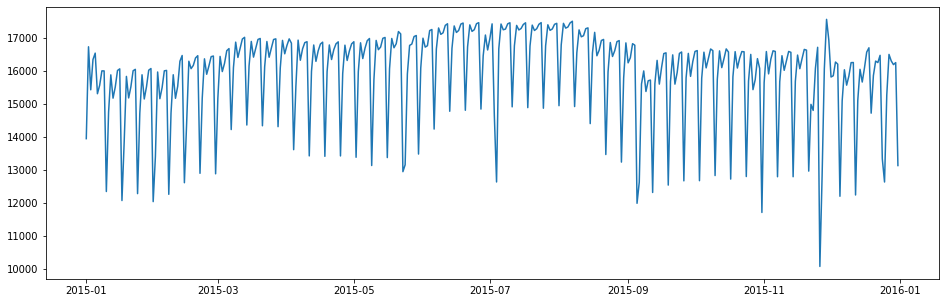

In [456]:
import matplotlib.pyplot as plt
x = df_count["DATE"]
y = df_count["Count"]
plt.figure(figsize=(16,5))
plt.plot(x, y)

plt.show()

Let's examine which airline has flown the most

In [457]:
df_num = df["AIRLINE"].value_counts()
df_num



WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

* We see WN (Soutwest Airlines) has flown by far the most in 2015
* Let's explore Southwest Airline flights more

In [458]:
df1

,YEAR,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,DISTANCE,AIR_TIME,DATE
0,2015,1,1,AS,ANC,SEA,-22.0,1448,169.0,2015-01-01
1,2015,1,1,AA,LAX,PBI,-9.0,2330,263.0,2015-01-01
2,2015,1,1,US,SFO,CLT,5.0,2296,266.0,2015-01-01
3,2015,1,1,AA,LAX,MIA,-9.0,2342,258.0,2015-01-01
4,2015,1,1,AS,SEA,ANC,-21.0,1448,199.0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,B6,LAX,BOS,-26.0,2611,272.0,2015-12-31
5819075,2015,12,31,B6,JFK,PSE,-16.0,1617,195.0,2015-12-31
5819076,2015,12,31,B6,JFK,SJU,-8.0,1598,197.0,2015-12-31
5819077,2015,12,31,B6,MCO,SJU,-10.0,1189,144.0,2015-12-31


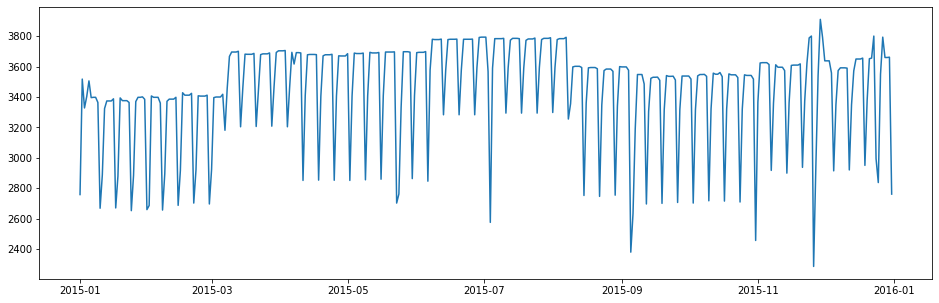

In [459]:
df1 = df1[df1["AIRLINE"]=="WN"]
df1["Rout"] = df1["ORIGIN_AIRPORT"] +df1["DESTINATION_AIRPORT"]
a=df1.groupby("DATE").size().values

df_flights= df1.drop_duplicates(subset="DATE").assign(Count=a)
x = df_flights["DATE"]
y = df_flights["Count"]
plt.figure(figsize=(16,5))
plt.plot(x, y)

plt.show()


The plot is quite similar when all the flights combined


Let's examine how many flights were delayed

In [460]:
df1
df_delay=df1[["DATE","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","ARRIVAL_DELAY"]]

total_flights=len(df_delay)
df_delay = df_delay[df_delay["ARRIVAL_DELAY"]<0]
delayed_flights = len(df_delay)
percentage_of_delay= (delayed_flights/total_flights)*100
print("the percentage of delays for all (Soutwest Airlines) flights",round(percentage_of_delay),"%")



the percentage of delays for all (Soutwest Airlines) flights 59 %


* 60 % of all flights were delayed

Let's explore Southwest Airline's most popular flight route


In [461]:

df1 = df1[["DATE","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","ARRIVAL_DELAY","Rout","DISTANCE","AIR_TIME"]]
df1
a=df1.groupby("Rout").size().values

df_rout= df1.drop_duplicates(subset="Rout").assign(Count=a)
df_rout = df_rout[["Rout","Count"]]
df_rout = df_rout.sort_values("Count",ascending=False)
df_rout = df_rout[pd.to_numeric(df_rout['Rout'], errors='coerce').isnull()]
df_rout.head(10)

,Rout,Count
1326,MCIMSY,1120
5411694,MEMAUS,1104
5413488,AUSMEM,973
4874573,INDLGA,972
5099009,LASCAK,929
4975361,HOUTUS,927
5810256,DTWMCO,918
4878065,AUSSEA,870
4877797,LGAIND,846
3225,MDWMSY,739


Route flown by South west Airline (top 10)
1. MCI - MSY
2. MEM - AUS
3. AUS - MEM
4. IND - LGA
5. LAS - CAK
6. HOU - TUS
7. DTW - MCO
8. AUS - SEA
9. LGA - IND
10.  MDW - MSY 

# Time series Prediction
* Southwest Airlines flights (2015)

Check the stationarity of time series

In [462]:
from statsmodels.tsa.stattools import adfuller
df = df_flights[["Count","DATE"]]

df = df.set_index("DATE")

X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.216643
p-value: 0.200261
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


* Series in non-stationary.
* Since the series isn’t stationary, we will commit to the first-order differencing.

ADF Statistic: -6.243908
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Stationary


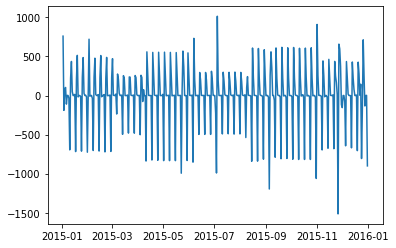

In [463]:
df["Count_diff"] = df["Count"]-df["Count"].shift(1)
df.dropna(subset = ["Count_diff"], inplace=True)

x = df["Count_diff"]

result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

plt.plot(df["Count_diff"])
print("Stationary")
plt.show()

Now series is stationary! p-value < 0.05

* Building the model
-   Lest apply ARIMA and SARIMAX to our data and see which one works better.

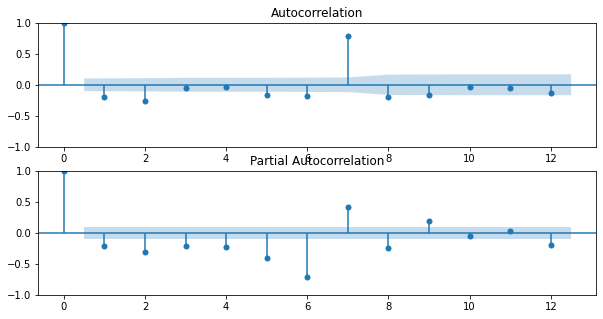

In [464]:
import statsmodels.api as sm
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(df["Count_diff"], lags=12, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(df["Count_diff"], lags=12, ax=ax[1])
plt.show()

We can see that:
* For acf plot, initial spikes at lag = 1 and seasonal spikes at 7. AR order of 1.
* For pacf plot, initial spikes at lag = 1 and seasonal spikes at 6. MA order of 1.
* SARIMA(p,d,q)x(P,D,Q,m)

* p and seasonal P: indicate number of autoregressive terms (lags of the stationarized series)
* d and seasonal D: indicate differencing that must be done to stationarize series
* q and seasonal Q: indicate number of moving average terms (lags of the forecast errors)
* m: indicates seasonal length in the data



In [465]:
from pmdarima import auto_arima

model_fit = auto_arima(df["Count_diff"], start_p=0, max_p=6, start_q=0, max_q=3, seasonal=False, trace=True)

print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5331.991, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5318.196, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5200.824, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5183.425, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5155.541, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5282.277, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5146.385, Time=0.48 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5267.728, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5116.698, Time=0.40 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5249.430, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=5054.074, Time=0.60 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5181.661, Time=0.11 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=4802.302, Time=0.99 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=4866.811, Time=0.39 sec
 ARIMA(6,0,2)(0,0,0)[0]          

* Best model: ARIMA(6,0,1)
* Our SARIMA model equation can be SARIMA(1,1,1)x(1,1,1)*12

c:\Users\Aapop\PycharmProjects\pythonProject\Data\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\Aapop\PycharmProjects\pythonProject\Data\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


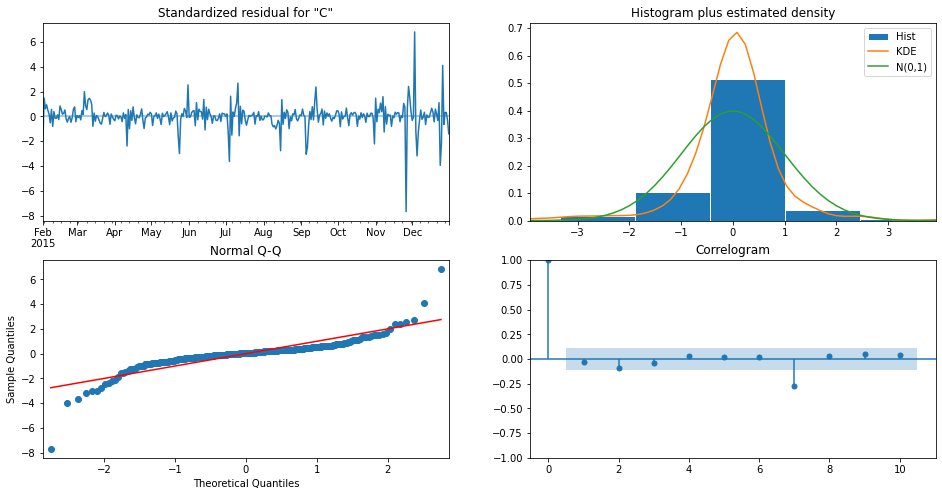

In [466]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams


mod = SARIMAX(
df["Count_diff"],
order=(6, 0, 1), seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()

results.plot_diagnostics(figsize=(16, 8))
plt.show()



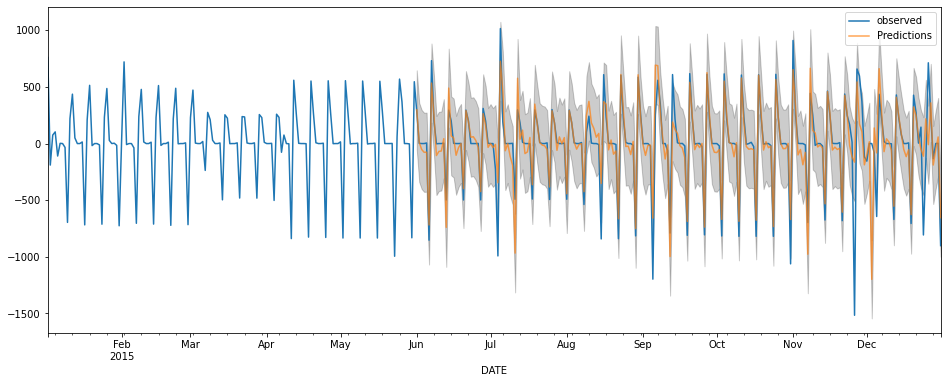

In [467]:

start_forecast = 150
pred = results.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = df["Count_diff"].plot(label='observed',figsize = (16, 6))
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()

plt.show()

Time series forecast for 2 year:


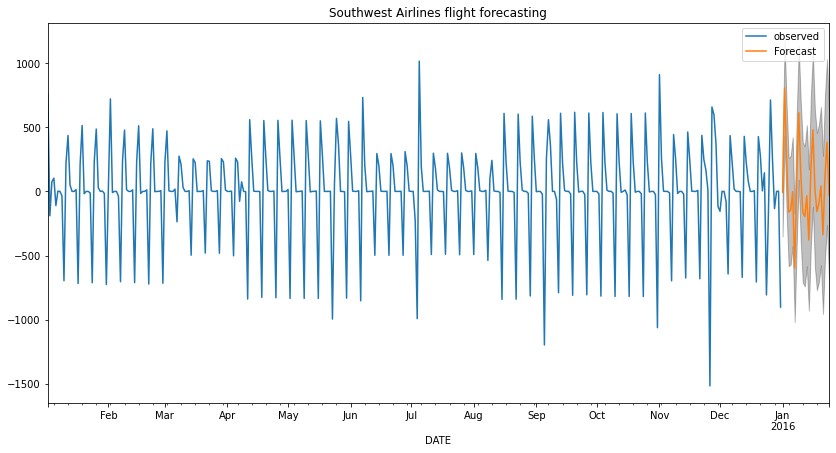

In [468]:
years = 2

pred_uc = results.get_forecast(steps=12*years)
pred_ci = pred_uc.conf_int()
ax = df["Count_diff"].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title('Southwest Airlines flight forecasting')

plt.legend()
plt.show()